#### Gradient tape evaluation

Finite difference to get the derivative with numerical methods (I assume given the results that this is exactly what *tensorflow* does) 

In [20]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
# Custom utils
from utils.utils.utils import FinanceUtils, ZeroBound
from utils.simulator.simulator import MCSimulation
# Tf imports
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
def custom_derivative(x, mode = 'centered'):
    h = 1e-10
    # Constantes:
    T = 1
    ct = FinanceUtils.C(T, sigma = FinanceUtils.sigma)
    denominator = h
    if mode == 'progressive':
        numerator = FinanceUtils.zero_bond_coupon_np(x + h, T, ct) - FinanceUtils.zero_bond_coupon_np(x, T , ct)
    elif mode == 'regressive':
        numerator = FinanceUtils.zero_bond_coupon_np(x, T, ct) - FinanceUtils.zero_bond_coupon_np(x - h, T, ct)
    elif mode == 'centered':
        numerator = FinanceUtils.zero_bond_coupon_np(x + h, T , ct) - FinanceUtils.zero_bond_coupon_np(x - h, T, ct)
        denominator = 2 * h
    return numerator / denominator

In [71]:
x = np.linspace(0, 1)
xt = tf.Variable(x, trainable=True, name = 'xn')
tn = tf.Variable(np.array([np.float64(1.0)] * len(x)), name = 'tn', trainable = False)
ct = tf.Variable(
    np.array([np.float64(FinanceUtils.C(1.0, sigma = FinanceUtils.sigma))] * len(x)), 
    trainable=False
)
# Autodiff f
with tf.GradientTape() as tape:
    y = FinanceUtils.zero_bond_coupon(xt, tn, ct)
grad_df = tape.gradient(y, {
    'xn':xt
})
tf_grads = grad_df['xn'].numpy()

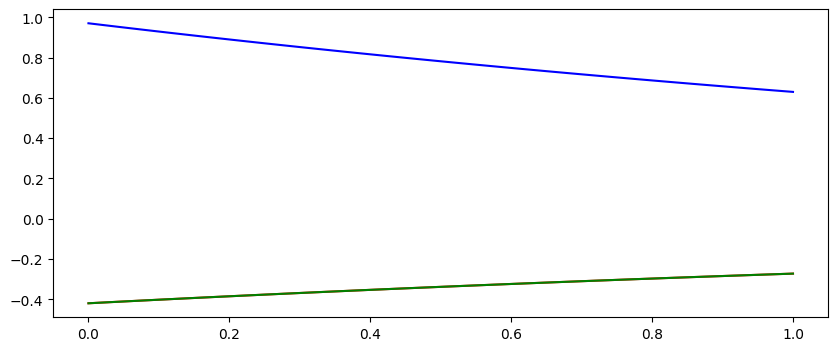

In [72]:
T = 1
ct = FinanceUtils.C(T, sigma = FinanceUtils.sigma)
coupons = FinanceUtils.zero_bond_coupon_np(x, T , ct)
derivative = custom_derivative(x)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(
    figsize = (10,4)
)
sns.lineplot(
    x = x,
    y = coupons,
    color = 'blue'
)
sns.lineplot(
    x = x,
    y = derivative,
    color = 'red'
)
sns.lineplot(
    x = x,
    y = tf_grads,
    color = 'green'
)
plt.show()